In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras_tuner import RandomSearch

In [ ]:
!pip install keras-tuner


In [ ]:
df= pd.read_csv('/content/NIFTY_50_combined.csv')

In [ ]:
df.head(5)

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,01-JAN-2020,12202.15,12222.20,12165.30,12182.50,304078039,10445.68
1,02-JAN-2020,12198.55,12289.90,12195.25,12282.20,407697594,15256.55
2,03-JAN-2020,12261.10,12265.60,12191.35,12226.65,428770054,16827.27
3,06-JAN-2020,12170.60,12179.10,11974.20,11993.05,396501419,16869.22
4,07-JAN-2020,12079.10,12152.15,12005.35,12052.95,447818617,17797.68


## Storing the closing_price

In [ ]:
df.columns = df.columns.str.strip()
closing_prices = df['Close'].tolist()
print("Number of closing prices:", len(closing_prices))
print("First 5 closing prices:", closing_prices[:5])

Number of closing prices: 746
First 5 closing prices: [12182.5, 12282.2, 12226.65, 11993.05, 12052.95]


In [ ]:
closing_prices = np.array(closing_prices).reshape(-1, 1)
print("Reshaped Closing Prices:\n", closing_prices)

Reshaped Closing Prices:
 [[12182.5 ]
 [12282.2 ]
 [12226.65]
 [11993.05]
 [12052.95]
 [12025.35]
 [12215.9 ]
 [12256.8 ]
 [12329.55]
 [12362.3 ]
 [12343.3 ]
 [12355.5 ]
 [12352.35]
 [12224.55]
 [12169.85]
 [12106.9 ]
 [12180.35]
 [12248.25]
 [12119.  ]
 [12055.8 ]
 [12129.5 ]
 [12035.8 ]
 [11962.1 ]
 [11661.85]
 [11707.9 ]
 [11979.65]
 [12089.15]
 [12137.95]
 [12098.35]
 [12031.5 ]
 [12107.9 ]
 [12201.2 ]
 [12174.65]
 [12113.45]
 [12045.8 ]
 [11992.5 ]
 [12125.9 ]
 [12080.85]
 [11829.4 ]
 [11797.9 ]
 [11678.5 ]
 [11633.3 ]
 [11201.75]
 [11132.75]
 [11303.3 ]
 [11251.  ]
 [11269.  ]
 [10989.45]
 [10451.45]
 [10458.4 ]
 [ 9590.15]
 [ 9955.2 ]
 [ 9197.4 ]
 [ 8967.05]
 [ 8468.8 ]
 [ 8263.45]
 [ 8745.45]
 [ 7610.25]
 [ 7801.05]
 [ 8317.85]
 [ 8641.45]
 [ 8660.25]
 [ 8281.1 ]
 [ 8597.75]
 [ 8253.8 ]
 [ 8083.8 ]
 [ 8792.2 ]
 [ 8748.75]
 [ 9111.9 ]
 [ 8993.85]
 [ 8925.3 ]
 [ 8992.8 ]
 [ 9266.75]
 [ 9261.85]
 [ 8981.45]
 [ 9187.3 ]
 [ 9313.9 ]
 [ 9154.4 ]
 [ 9282.3 ]
 [ 9380.9 ]
 [ 9553.35]
 [

In [ ]:
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(closing_prices)

In [ ]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

In [ ]:
sequence_length = 10
X, y = create_sequences(scaled_prices, sequence_length)

In [ ]:
print(X.shape)
print(y.shape)

(736, 10, 1)
(736, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=40, batch_size=16, validation_data=(X_test, y_test))
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


y_pred_total_data = model.predict(X)
y_pred_inverse_total_data = scaler.inverse_transform(y_pred_total_data)
y_inverse_total_data = scaler.inverse_transform(y)


Epoch 1/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.8234e-04 - val_loss: 4.3648e-04
Epoch 2/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3627e-04 - val_loss: 4.0877e-04
Epoch 3/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.2858e-04 - val_loss: 2.7498e-04
Epoch 4/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9250e-04 - val_loss: 2.6756e-04
Epoch 5/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3282e-04 - val_loss: 2.5929e-04
Epoch 6/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7332e-04 - val_loss: 2.2191e-04
Epoch 7/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5998e-04 - val_loss: 2.3384e-04
Epoch 8/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4003e-04 - val_loss: 2.4273e-04
Epoch 9/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8435e-04 - val_loss: 2.2758e-04
Epoch 10/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4024e-04 - val_loss: 2.3690e-04
Epoch 11/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.4090e-04 - val_los

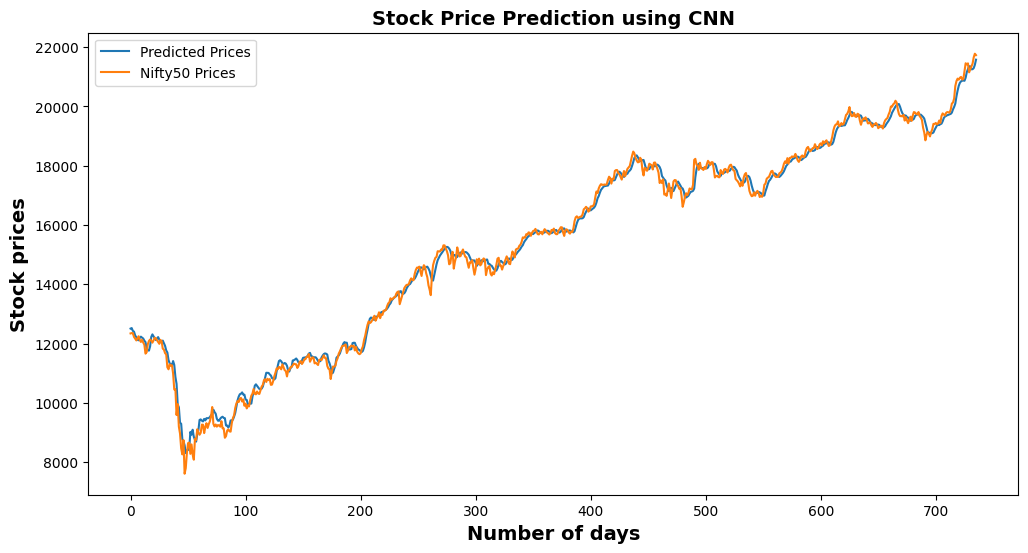

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_pred_inverse_total_data , label="Predicted Prices")
plt.plot(y_inverse_total_data, label="Nifty50 Prices")
plt.xlabel("Number of days",fontsize=14,fontweight='bold')
plt.ylabel("Stock prices",fontsize=14,fontweight='bold')
plt.title("Stock Price Prediction using CNN",fontsize=14,fontweight='bold')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y, y_pred_total_data)
mse = mean_squared_error(y, y_pred_total_data)
r2 = r2_score(y, y_pred_total_data)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.021492786452451767
Mean Squared Error (MSE): 0.0006911630007510331
R-squared (R²): 0.9883270779061689


## Finetuning

In [ ]:
# Define a function to build the model for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('filters', min_value=16, max_value=128, step=16),
                     kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
                     activation='relu',
                     input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mse',
                  metrics=['mse'])
    return model

In [ ]:
# Use Keras Tuner for hyperparameter tuning
tuner = RandomSearch(
    build_model,
    objective='mse',
    max_trials=10,
    executions_per_trial=2,
    directory='hyperparam_tuning',
    project_name='1d_cnn_stock_forecasting')

tuner.search(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

Trial 10 Complete [00h 00m 15s]
mse: 0.008995659183710814

Best mse So Far: 0.0012730107409879565
Total elapsed time: 00h 01m 58s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: Filters: {best_hps.get('filters')}, Kernel Size: {best_hps.get('kernel_size')}, Units: {best_hps.get('units')}, Dropout: {best_hps.get('dropout')}, Learning Rate: {best_hps.get('learning_rate')}")


Best Hyperparameters: Filters: 96, Kernel Size: 5, Units: 160, Dropout: 0.1, Learning Rate: 0.01


In [ ]:
model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs=40, validation_split=0.2, verbose=1)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0724 - mse: 0.0724 - val_loss: 7.9008e-04 - val_mse: 7.9008e-04
Epoch 2/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 9.8763e-04 - val_mse: 9.8763e-04
Epoch 3/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 6.9635e-04 - val_mse: 6.9635e-04
Epoch 4/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 6.4395e-04 - val_mse: 6.4395e-04
Epoch 5/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 7.0346e-04 - val_mse: 7.0346e-04
Epoch 6/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 7/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5436e-04 - val_mse: 7.5436e-04
Epoch 8/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 9/40
15/15 ━━━━━━━━━━━━━━━━━

In [ ]:
y_pred_total_data_hp = model.predict(X)
y_pred_inverse_total_data_hp = scaler.inverse_transform(y_pred_total_data_hp)
y_inverse_total_data_hp = scaler.inverse_transform(y)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Test Mean Squared Error: 0.00030971136446689607


In [ ]:
# Plot actual vs predicted
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_original = scaler.inverse_transform(y_pred)

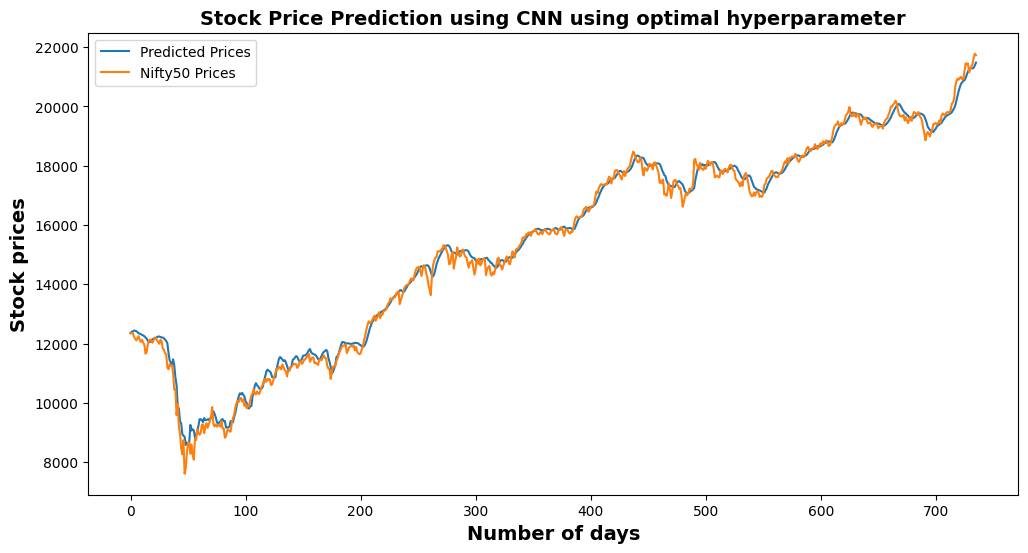

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_pred_inverse_total_data_hp, label="Predicted Prices")
plt.plot(y_inverse_total_data_hp, label="Nifty50 Prices")
plt.xlabel("Number of days",fontsize=14,fontweight='bold')
plt.ylabel("Stock prices",fontsize=14,fontweight='bold')
plt.title("Stock Price Prediction using CNN using optimal hyperparameter",fontsize=14,fontweight='bold')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y, y_pred_total_data_hp)
mse = mean_squared_error(y, y_pred_total_data_hp)
r2 = r2_score(y, y_pred_total_data_hp)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.013187007777377168
Mean Squared Error (MSE): 0.0003202839890135267
R-squared (R²): 0.9945907838706733
